## 🔧 Importazione librerie

In [1]:
# Importiamo le librerie
import sklearn
print("sklearn successfully imported")
import numpy as np
print("numpy successfully imported")
import pandas as pd
print("pandas successfully imported")
import matplotlib.pyplot as plt
print("matplotlib successfully imported")
import seaborn as sns
print("seaborn successfully imported")
from collections import Counter, defaultdict
print("collections successfully imported")
import re
print("re successfully imported")
import math
print("math successfully imported")

# Librerie per NLP
import nltk
print("nltk successfully imported")
import spacy
print("spacy successfully imported")
from spacy.cli import download
download("it_core_news_sm")
from nltk.corpus import stopwords
print("nltk.corpus successfully imported")
from nltk.tokenize import word_tokenize
print("nltk.tokenize successfully imported")

# Librerie per embeddings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
print("sklearn - embedding - successfully imported")
import gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
print("gensim successfully imported")

# Visualizzazioni
from wordcloud import WordCloud
print("wordcloud successfully imported")
import plotly.express as px
import plotly.graph_objects as go
print("plotly successfully imported")

# Download dati NLTK
nltk.download('punkt')
nltk.download('stopwords')
print("NLTK data successfully downloaded")

# Configurazione grafica
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Setup completato! Pronti per esplorare i Word Embeddings.")

sklearn successfully imported
numpy successfully imported
pandas successfully imported
matplotlib successfully imported
seaborn successfully imported
collections successfully imported
re successfully imported
math successfully imported
nltk successfully imported
spacy successfully imported
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
nltk.corpus successfully imported
nltk.tokenize successfully imported
sklearn - embedding - successfully imported
gensim successfully imported
wordcloud successfully imported
plotly successfully imported


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARIANNABUSSOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARIANNABUSSOLA\AppData\Roaming\nltk_data...


NLTK data successfully downloaded
✅ Setup completato! Pronti per esplorare i Word Embeddings.


[nltk_data]   Package stopwords is already up-to-date!


## 🎒 Bag of Words (BoW)

🎒 BAG OF WORDS

📝 DOCUMENTI DI ESEMPIO:
   1. il gatto dorme sul divano
   2. il cane corre nel parco
   3. il gatto e il cane sono amici
   4. sul divano c'è un gatto nero
   5. nel parco corrono molti cani

📚 VOCABOLARIO (18 parole):
['amici', "c'è", 'cane', 'cani', 'corre', 'corrono', 'divano', 'dorme', 'e', 'gatto', 'il', 'molti', 'nel', 'nero', 'parco', 'sono', 'sul', 'un']

🔢 MATRICE BAG OF WORDS (5 documenti x 18 parole):


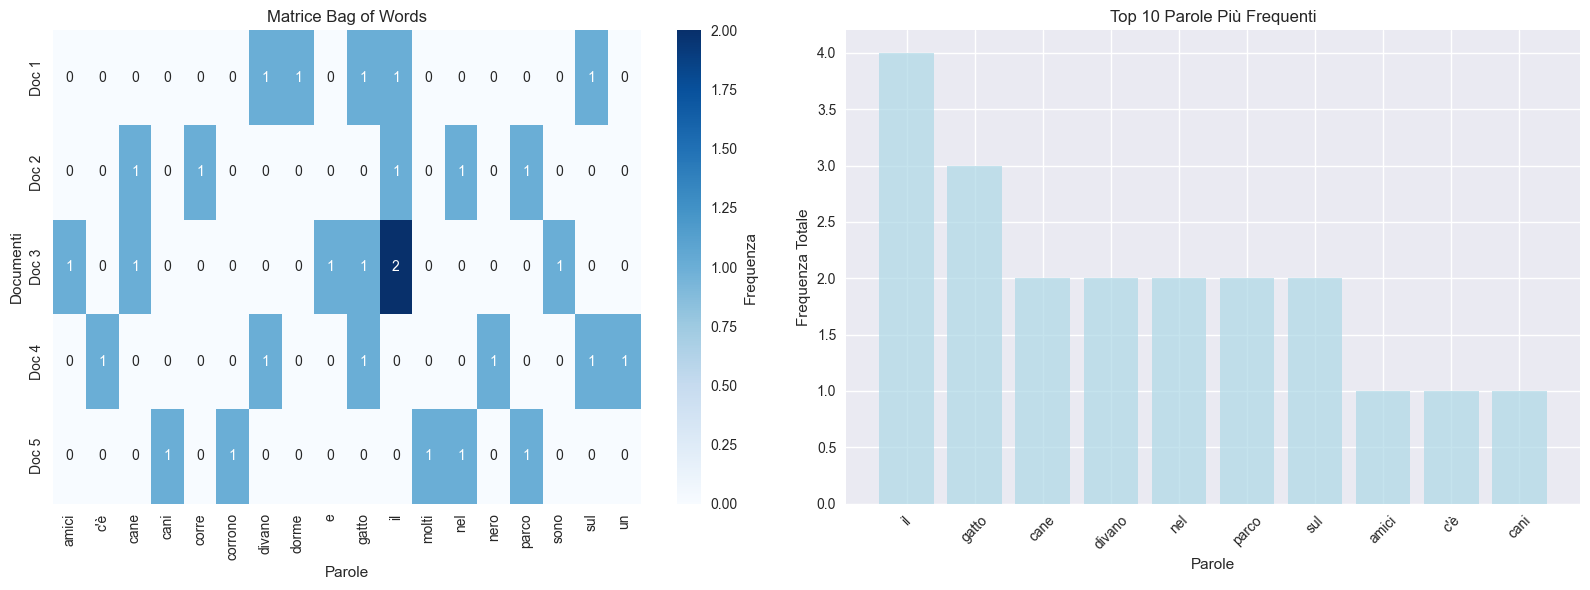


📊 Matrice di similarità tra documenti:


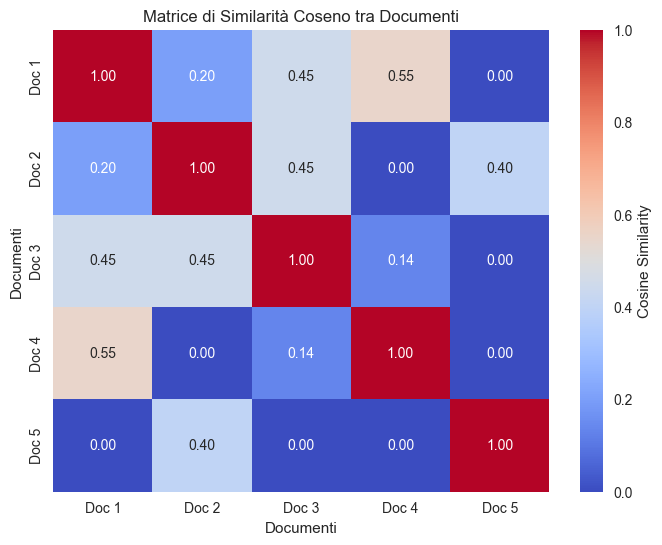

In [24]:
# Implementiamo Bag of Words da zero
class BagOfWords:
    def __init__(self):
        self.vocabolario = {}
        self.vocabolario_inverso = {}
        self.dimensione_vocab = 0
    
    def costruisci_vocabolario(self, documenti):
        """Costruisce il vocabolario da una lista di documenti"""
        tutte_parole = set()

        # per ogni documento aggiungo le parole nel set - automaticamente senza duplicati -
        for doc in documenti:
            parole = doc.lower().split()
            tutte_parole.update(parole)
        
        # Crea mappatura parola -> indice
        for i, parola in enumerate(sorted(tutte_parole)):
            self.vocabolario[parola] = i
            self.vocabolario_inverso[i] = parola
        
        self.dimensione_vocab = len(self.vocabolario)
    
    def documento_to_vettore(self, documento):
        """Converte un documento in vettore BoW"""
        vettore = np.zeros(self.dimensione_vocab)
        parole = documento.lower().split()

        # loop su ogni parola del documento (vettore 'parole') e per ognuna aggiunge un +1 alla relativa cella nel vettore di token (vettore 'vettore')
        for parola in parole:
            if parola in self.vocabolario:
                indice = self.vocabolario[parola]
                vettore[indice] += 1
        
        return vettore
    
    def trasforma_documenti(self, documenti):
        """Trasforma una lista di documenti in matrice BoW"""
        matrice = []
        for doc in documenti:
            vettore = self.documento_to_vettore(doc)
            matrice.append(vettore)
        return np.array(matrice)

# Test con documenti di esempio
print("🎒 BAG OF WORDS\n")

documenti_esempio = [
    "il gatto dorme sul divano",
    "il cane corre nel parco",
    "il gatto e il cane sono amici",
    "sul divano c'è un gatto nero",
    "nel parco corrono molti cani"
]

print("📝 DOCUMENTI DI ESEMPIO:")
for i, doc in enumerate(documenti_esempio, 1):
    print(f"   {i}. {doc}")

# Costruiamo il modello BoW
bow = BagOfWords()
bow.costruisci_vocabolario(documenti_esempio)

print(f"\n📚 VOCABOLARIO ({bow.dimensione_vocab} parole):")
print(list(bow.vocabolario.keys()))

# Trasformiamo i documenti
matrice_bow = bow.trasforma_documenti(documenti_esempio)

print(f"\n🔢 MATRICE BAG OF WORDS ({matrice_bow.shape[0]} documenti x {matrice_bow.shape[1]} parole):")

# Creiamo un DataFrame per visualizzare meglio
df_bow = pd.DataFrame(matrice_bow, 
                      columns=list(bow.vocabolario.keys()),
                      index=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

#print(df_bow)

# Visualizzazione della matrice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap della matrice BoW
sns.heatmap(df_bow, annot=True, cmap='Blues', ax=ax1, cbar_kws={'label': 'Frequenza'})
ax1.set_title('Matrice Bag of Words')
ax1.set_xlabel('Parole')
ax1.set_ylabel('Documenti')

# Frequenze totali delle parole
freq_parole = matrice_bow.sum(axis=0)
parole_ordinate = sorted(bow.vocabolario.keys(), key=lambda x: freq_parole[bow.vocabolario[x]], reverse=True)
freq_ordinate = [freq_parole[bow.vocabolario[p]] for p in parole_ordinate[:10]]

ax2.bar(parole_ordinate[:10], freq_ordinate, color='lightblue', alpha=0.7)
ax2.set_title('Top 10 Parole Più Frequenti')
ax2.set_xlabel('Parole')
ax2.set_ylabel('Frequenza Totale')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# -------------------------------
# Calcolo similarità coseno
# -------------------------------
from sklearn.metrics.pairwise import cosine_similarity

similarita = cosine_similarity(matrice_bow)

# Creiamo un DataFrame per una visualizzazione più chiara
df_similarita = pd.DataFrame(similarita, 
                             index=[f"Doc {i+1}" for i in range(len(documenti_esempio))],
                             columns=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

print("\n📊 Matrice di similarità tra documenti:")
#print(df_similarita)

# -------------------------------
# Heatmap della similarità
# -------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarita, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Cosine Similarity'})
plt.title('Matrice di Similarità Coseno tra Documenti')
plt.xlabel('Documenti')
plt.ylabel('Documenti')
plt.show()



## 📊 Term Frequency - Inverse Document Frequency (TF-IDF)

📊 TF-IDF

📚 Vocabolario TF-IDF: 18 parole

🔢 PUNTEGGI IDF (Inverse Document Frequency):
   'dorme': 1.609
   'corre': 1.609
   'e': 1.609
   'sono': 1.609
   'amici': 1.609
   'nero': 1.609
   'un': 1.609
   'c'è': 1.609
   'corrono': 1.609
   'cani': 1.609
   'molti': 1.609
   'divano': 0.916
   'sul': 0.916
   'cane': 0.916
   'nel': 0.916
   'parco': 0.916
   'il': 0.511
   'gatto': 0.511


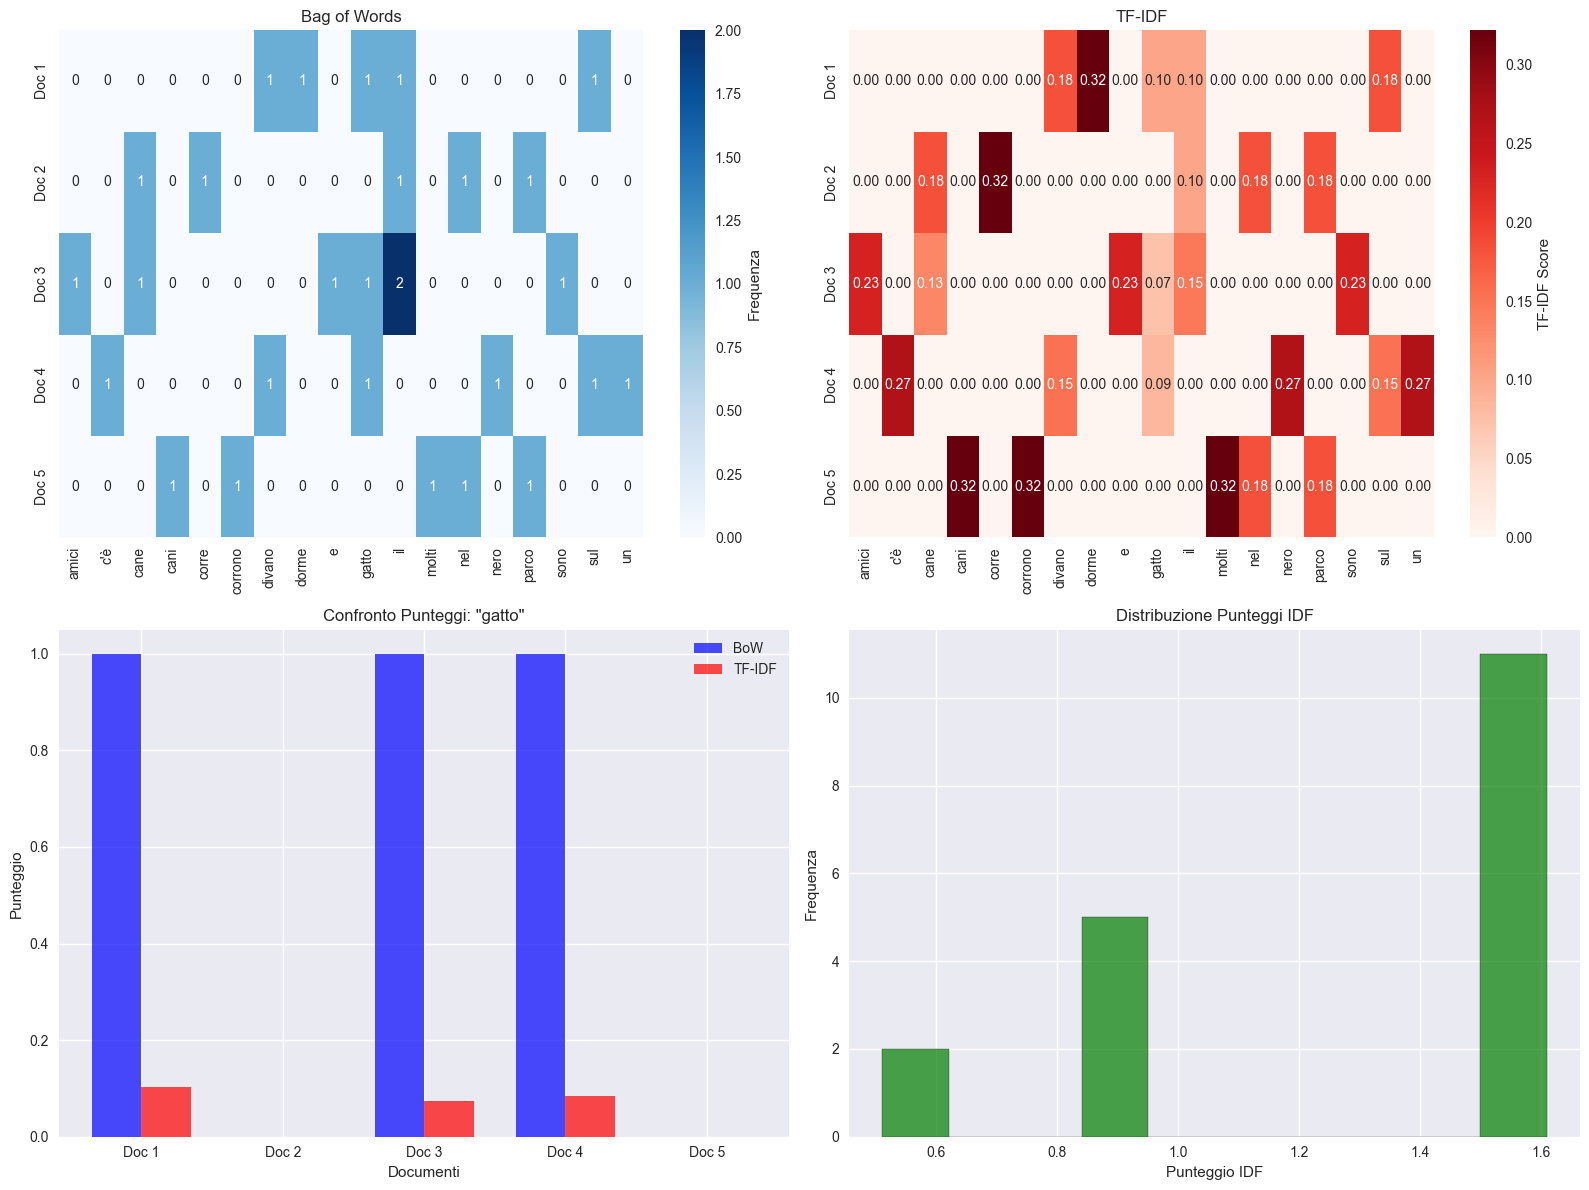

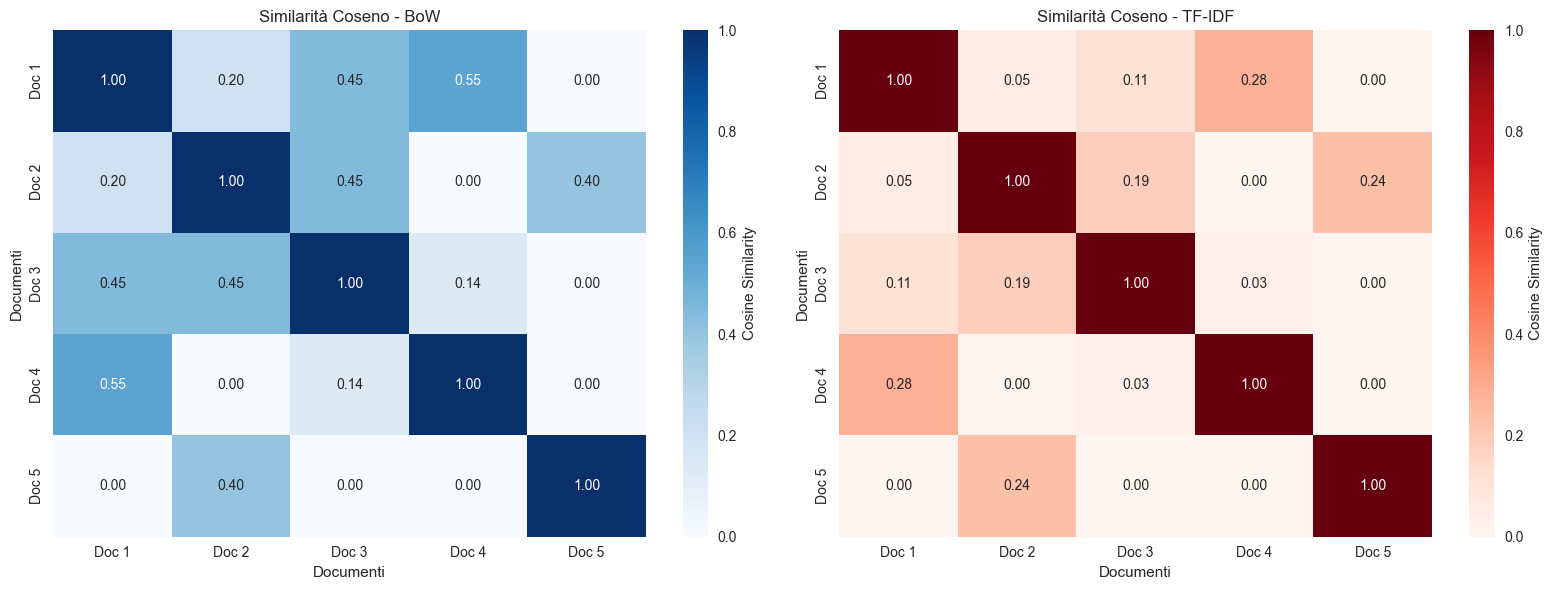

In [25]:
# Implementiamo TF-IDF da zero
class TFIDF:
    def __init__(self):
        self.vocabolario = {}
        self.idf_scores = {}
        self.dimensione_vocab = 0
    
    def calcola_tf(self, documento):
        """Calcola Term Frequency per un documento"""
        parole = documento.lower().split()
        tf = Counter(parole)
        
        # Normalizza per la lunghezza del documento
        lunghezza_doc = len(parole)
        for parola in tf:
            # numero di volte che parola appare nel documento / numero di parole del documento
            tf[parola] = tf[parola] / lunghezza_doc
        
        return tf
    
    def calcola_idf(self, documenti):
        """Calcola Inverse Document Frequency"""
        n_documenti = len(documenti)
        
        # Conta in quanti documenti appare ogni parola
        df = defaultdict(int)  # document frequency

        # creo un dizionario con coppie {parola, numero di documenti in cui la parola appare}
        for doc in documenti:
            parole_uniche = set(doc.lower().split())
            for parola in parole_uniche:
                df[parola] += 1
        
        # Calcola IDF: per ogni parola, calcola il logaritmo di ( numero di documenti totale / numero di documenti in cui la parola appare )
        for parola, freq_doc in df.items():
            self.idf_scores[parola] = math.log(n_documenti / freq_doc)
        
        # Costruisci vocabolario
        for i, parola in enumerate(sorted(df.keys())):
            self.vocabolario[parola] = i
        
        self.dimensione_vocab = len(self.vocabolario)
    
    def documento_to_tfidf(self, documento):
        """Converte documento in vettore TF-IDF"""
        tf = self.calcola_tf(documento)
        vettore = np.zeros(self.dimensione_vocab)
        
        for parola, tf_score in tf.items():
            if parola in self.vocabolario:
                indice = self.vocabolario[parola]
                idf_score = self.idf_scores[parola]
                vettore[indice] = tf_score * idf_score
        
        return vettore
    
    def fit_transform(self, documenti):
        """Addestra e trasforma i documenti"""
        self.calcola_idf(documenti)

        # crea la matrice TF-IDF con un vettore per ogni documento
        matrice = []
        for doc in documenti:
            vettore = self.documento_to_tfidf(doc)
            matrice.append(vettore)
        
        return np.array(matrice)

# Test TF-IDF
print("📊 TF-IDF\n")

# Usiamo gli stessi documenti
tfidf = TFIDF()
matrice_tfidf = tfidf.fit_transform(documenti_esempio)

print(f"📚 Vocabolario TF-IDF: {tfidf.dimensione_vocab} parole")

# Mostriamo i punteggi IDF
print("\n🔢 PUNTEGGI IDF (Inverse Document Frequency):")
idf_ordinati = sorted(tfidf.idf_scores.items(), key=lambda x: x[1], reverse=True)
for parola, idf in idf_ordinati:
    print(f"   '{parola}': {idf:.3f}")

# Confronto BoW vs TF-IDF
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# DataFrame per TF-IDF
df_tfidf = pd.DataFrame(matrice_tfidf, 
                        columns=list(tfidf.vocabolario.keys()),
                        index=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

# Heatmap BoW
sns.heatmap(df_bow, annot=True, cmap='Blues', ax=axes[0,0], 
            cbar_kws={'label': 'Frequenza'})
axes[0,0].set_title('Bag of Words')

# Heatmap TF-IDF
sns.heatmap(df_tfidf, annot=True, fmt='.2f', cmap='Reds', ax=axes[0,1],
            cbar_kws={'label': 'TF-IDF Score'})
axes[0,1].set_title('TF-IDF')

# Confronto punteggi per una parola specifica
parola_esempio = 'gatto'
if parola_esempio in bow.vocabolario and parola_esempio in tfidf.vocabolario:
    idx_bow = bow.vocabolario[parola_esempio]
    idx_tfidf = tfidf.vocabolario[parola_esempio]
    
    bow_scores = matrice_bow[:, idx_bow]
    tfidf_scores = matrice_tfidf[:, idx_tfidf]
    
    x = np.arange(len(documenti_esempio))
    width = 0.35
    
    axes[1,0].bar(x - width/2, bow_scores, width, label='BoW', alpha=0.7, color='blue')
    axes[1,0].bar(x + width/2, tfidf_scores, width, label='TF-IDF', alpha=0.7, color='red')
    axes[1,0].set_title(f'Confronto Punteggi: "{parola_esempio}"')
    axes[1,0].set_xlabel('Documenti')
    axes[1,0].set_ylabel('Punteggio')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels([f'Doc {i+1}' for i in range(len(documenti_esempio))])
    axes[1,0].legend()

# Distribuzione punteggi IDF
idf_values = list(tfidf.idf_scores.values())
axes[1,1].hist(idf_values, bins=10, alpha=0.7, color='green', edgecolor='black')
axes[1,1].set_title('Distribuzione Punteggi IDF')
axes[1,1].set_xlabel('Punteggio IDF')
axes[1,1].set_ylabel('Frequenza')

plt.tight_layout()
plt.show()

# -------------------------------
# Similarità coseno
# -------------------------------
sim_bow = cosine_similarity(matrice_bow)
sim_tfidf = cosine_similarity(matrice_tfidf)

# DataFrame per visualizzazione
df_sim_bow = pd.DataFrame(sim_bow, 
                          index=[f"Doc {i+1}" for i in range(len(documenti_esempio))],
                          columns=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

df_sim_tfidf = pd.DataFrame(sim_tfidf, 
                            index=[f"Doc {i+1}" for i in range(len(documenti_esempio))],
                            columns=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

#print("\n📊 Matrice di similarità - BoW:")
#print(df_sim_bow)

#print("\n📊 Matrice di similarità - TF-IDF:")
#print(df_sim_tfidf)

# -------------------------------
# Heatmap affiancate
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(df_sim_bow, annot=True, fmt=".2f", cmap='Blues', ax=axes[0], cbar_kws={'label': 'Cosine Similarity'})
axes[0].set_title('Similarità Coseno - BoW')
axes[0].set_xlabel('Documenti')
axes[0].set_ylabel('Documenti')

sns.heatmap(df_sim_tfidf, annot=True, fmt=".2f", cmap='Reds', ax=axes[1], cbar_kws={'label': 'Cosine Similarity'})
axes[1].set_title('Similarità Coseno - TF-IDF')
axes[1].set_xlabel('Documenti')
axes[1].set_ylabel('Documenti')

plt.tight_layout()
plt.show()

## 📊 N-grams

🌿 Testo originale

Machine learning e deep learning sono parti dell'intelligenza artificiale. 
Il machine learning migliora grazie al deep learning. Molti parlano di machine learning ogni giorno.


🎯 Tokens dopo la pre-elaborazione
['machine', 'learning', 'deep', 'learning', 'essere', 'parte', 'intelligenza', 'artificiale', 'machine', 'learning', 'migliorare', 'grazie', 'deep', 'learning', 'molto', 'parlare', 'machine', 'learning', 'ogni', 'giorno']

1️⃣ Unigrams
`['machine', 'learning', 'deep', 'learning', 'essere', 'parte', 'intelligenza', 'artificiale', 'machine', 'learning', 'migliorare', 'grazie', 'deep', 'learning', 'molto', 'parlare', 'machine', 'learning', 'ogni', 'giorno']`

2️⃣ Bigrams
`['machine learning', 'learning deep', 'deep learning', 'learning essere', 'essere parte', 'parte intelligenza', 'intelligenza artificiale', 'artificiale machine', 'machine learning', 'learning migliorare', 'migliorare grazie', 'grazie deep', 'deep learning', 'learning molto', 'molto parlare', 

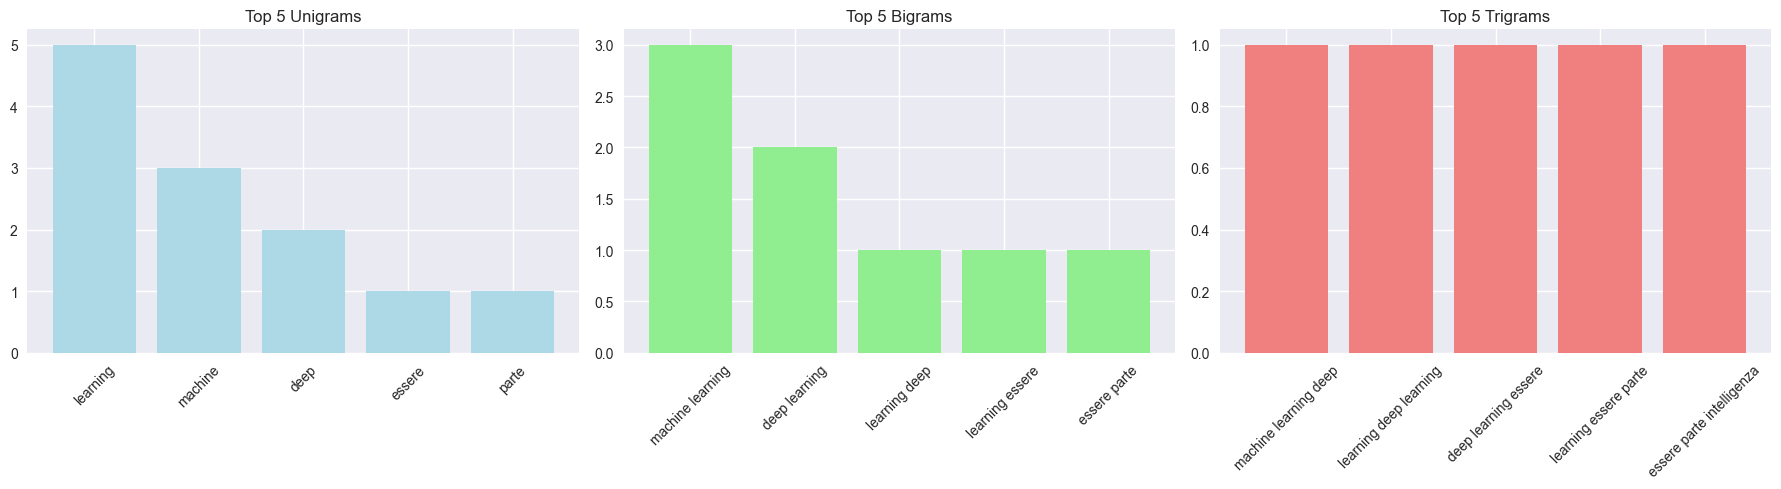

In [26]:
from nltk.util import ngrams
from nltk.stem import SnowballStemmer

# Pipeline completa di pre-elaborazione
class PipelinePreelaborazione:
    def __init__(self, lingua='italian'):
        """Inizializza la pipeline"""
        self.lingua = lingua
        self.nlp = spacy.load('it_core_news_sm' if lingua == 'italian' else 'en_core_web_sm')
        self.stemmer = SnowballStemmer(lingua)
        self.stop_words = set(stopwords.words(lingua))
        
        # Statistiche
        self.stats = {
            'testi_processati': 0,
            'token_originali': 0,
            'token_finali': 0,
            'stop_words_rimosse': 0
        }
    
    def pulisci_testo(self, testo):
        """Pulizia base del testo"""
        # Converti in minuscolo
        testo = testo.lower()
        
        # Rimuovi URL
        testo = re.sub(r'http\S+|www\S+|https\S+', '', testo)
        
        # Rimuovi email
        testo = re.sub(r'\S+@\S+', '', testo)
        
        # Rimuovi hashtag e mention
        testo = re.sub(r'#\w+|@\w+', '', testo)
        
        # Rimuovi numeri (opzionale)
        testo = re.sub(r'\d+', '', testo)
        
        # Rimuovi punteggiatura extra
        testo = re.sub(r'[^\w\s]', ' ', testo)
        
        # Rimuovi spazi multipli
        testo = re.sub(r'\s+', ' ', testo).strip()
        
        return testo
    
    def tokenizza_e_lemmatizza(self, testo):
        """Tokenizzazione e lemmatizzazione"""
        doc = self.nlp(testo)
        tokens = []
        
        for token in doc:
            if not token.is_punct and not token.is_space and len(token.text) > 2:
                # Usa lemma se disponibile, altrimenti stem
                if token.lemma_ != '-PRON-':  # spaCy usa -PRON- per pronomi
                    tokens.append(token.lemma_)
                else:
                    tokens.append(self.stemmer.stem(token.text))
        
        return tokens
    
    def rimuovi_stop_words(self, tokens):
        """Rimuove stop words"""
        tokens_filtrati = []
        stop_words_rimosse = 0
        
        for token in tokens:
            if token not in self.stop_words:
                tokens_filtrati.append(token)
            else:
                stop_words_rimosse += 1
        
        self.stats['stop_words_rimosse'] += stop_words_rimosse
        return tokens_filtrati
    
    def processa_testo(self, testo, rimuovi_stop=True, min_lunghezza=2):
        """Pipeline completa"""
        # Step 1: Pulizia
        testo_pulito = self.pulisci_testo(testo)
        
        # Step 2: Tokenizzazione e lemmatizzazione
        tokens = self.tokenizza_e_lemmatizza(testo_pulito)
        
        # Aggiorna statistiche
        self.stats['token_originali'] += len(tokens)
        
        # Step 3: Rimozione stop words (opzionale)
        if rimuovi_stop:
            tokens = self.rimuovi_stop_words(tokens)
        
        # Step 4: Filtra per lunghezza minima
        tokens = [token for token in tokens if len(token) >= min_lunghezza]
        
        # Aggiorna statistiche
        self.stats['token_finali'] += len(tokens)
        self.stats['testi_processati'] += 1
        
        return tokens

# Funzione interattiva per generare N-gram
def mostra_ngrams(testo):
    #tokens = nltk.word_tokenize(testo.lower())
    tokens = testo
    # Generazione n-gram
    unigrams = list(ngrams(tokens, 1))
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))
    
    # Visualizzazione
    print("\n🎯 Tokens dopo la pre-elaborazione")
    print(tokens)
    
    print("\n1️⃣ Unigrams")
    print(f"`{[' '.join(t) for t in unigrams]}`")
    
    print("\n2️⃣ Bigrams")
    print(f"`{[' '.join(t) for t in bigrams]}`")
 
    print("\n3️⃣ Trigrams")
    print(f"`{[' '.join(t) for t in trigrams]}`")
    
    # Frequenze Bigram
    bigram_freq = Counter(bigrams)
    print("\n📊 Frequenze Bigram")
    for k, v in bigram_freq.items():
        print(f"`{' '.join(k)}` : {v}")

    # Frequenze
    uni_freq = Counter(unigrams)
    bi_freq = Counter(bigrams)
    tri_freq = Counter(trigrams)
    
    # Prendere i primi 5 più frequenti
    top_n = 5
    uni_top = uni_freq.most_common(top_n)
    bi_top = bi_freq.most_common(top_n)
    tri_top = tri_freq.most_common(top_n)
    
    # Prepara dati per il grafico
    labels_uni = [' '.join(t[0]) for t in uni_top]
    values_uni = [t[1] for t in uni_top]
    
    labels_bi = [' '.join(t[0]) for t in bi_top]
    values_bi = [t[1] for t in bi_top]
    
    labels_tri = [' '.join(t[0]) for t in tri_top]
    values_tri = [t[1] for t in tri_top]
    
    # Grafico comparativo
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    axes[0].bar(labels_uni, values_uni, color='lightblue')
    axes[0].set_title('Top 5 Unigrams')
    axes[0].tick_params(axis='x', rotation=45)
    
    axes[1].bar(labels_bi, values_bi, color='lightgreen')
    axes[1].set_title('Top 5 Bigrams')
    axes[1].tick_params(axis='x', rotation=45)
    
    axes[2].bar(labels_tri, values_tri, color='lightcoral')
    axes[2].set_title('Top 5 Trigrams')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()       

# Esempio di testo interattivo
testo = """
Machine learning e deep learning sono parti dell'intelligenza artificiale. 
Il machine learning migliora grazie al deep learning. Molti parlano di machine learning ogni giorno.
"""

# Visualizza testo originale
print("🌿 Testo originale")
print(testo)

# Inizializza pipeline
pipeline = PipelinePreelaborazione()

# Pre-processa il testo
tokens = pipeline.processa_testo(testo)

# Creazione e analisi n-grams
mostra_ngrams(tokens)

## Applicazione n-grams su BoW

📚 Vocabolario costruito: 27 bigram unici
1. analizzare_grande
2. artificiale_analizzare
3. artificiale_controllare
4. artificiale_elabora
5. artificiale_gestire
6. autonomo_migliorare
7. autonomo_ottimizzare
8. controllare_robot
9. dato_migliorare
10. dato_ottimizza
11. di il_modello
12. di il_processo
13. efficienza_di il
14. elabora_grande
15. gestire_robot
16. grande_quantità
17. intelligenza_artificiale
18. migliorare_efficienza
19. migliorare_previsione
20. modello_predittivo
21. ottimizza_previsione
22. ottimizzare_processo
23. previsione_di il
24. processo_industriale
25. quantità_dato
26. robot_autonomo
27. sistema_intelligenza


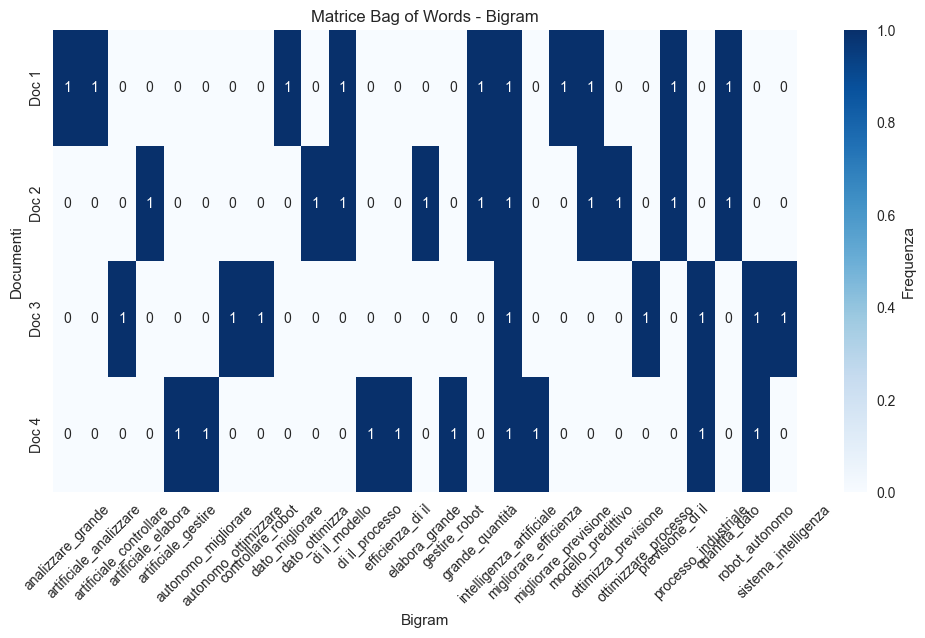

📊 Matrice di similarità tra documenti:


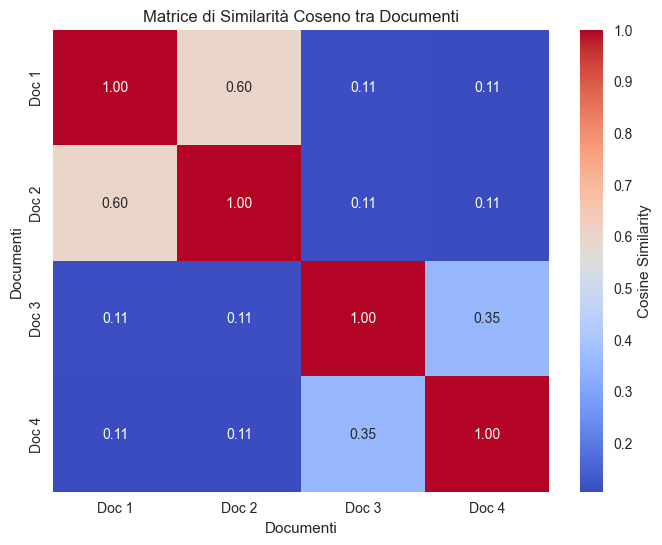

In [27]:
# Implementiamo Bag of Words con bigram
class BagOfWordsBigram:
    def __init__(self):
        self.vocabolario = {}
        self.vocabolario_inverso = {}
        self.dimensione_vocab = 0
    
    def genera_bigrams(self, parole):
        """Genera lista di bigram da una lista di parole"""
        return [f"{parole[i]}_{parole[i+1]}" for i in range(len(parole)-1)]
    
    def costruisci_vocabolario(self, documenti):
        """Costruisce il vocabolario di bigram da una lista di documenti"""
        tutti_bigram = set()
        
        for doc in documenti:
            parole = doc.lower().split()

            pipeline = PipelinePreelaborazione()

            # Pre-processa il testo
            tokens = pipeline.processa_testo(doc)
            
            bigram_doc = self.genera_bigrams(tokens)
            tutti_bigram.update(bigram_doc)
        
        # Crea mappatura bigram -> indice
        for i, bigram in enumerate(sorted(tutti_bigram)):
            self.vocabolario[bigram] = i
            self.vocabolario_inverso[i] = bigram
        
        self.dimensione_vocab = len(self.vocabolario)
        print(f"📚 Vocabolario costruito: {self.dimensione_vocab} bigram unici")
        for i, bigram in enumerate(sorted(self.vocabolario.keys()), 1):
            print(f"{i}. {bigram}")
    
    def documento_to_vettore(self, documento):
        """Converte un documento in vettore BoW di bigram"""
        vettore = np.zeros(self.dimensione_vocab)
        parole = documento.lower().split()

        pipeline = PipelinePreelaborazione()

        # Pre-processa il testo
        tokens = pipeline.processa_testo(documento)
        
        bigram_doc = self.genera_bigrams(tokens)
        
        for bigram in bigram_doc:
            if bigram in self.vocabolario:
                indice = self.vocabolario[bigram]
                vettore[indice] += 1
        
        return vettore
    
    def trasforma_documenti(self, documenti):
        """Trasforma una lista di documenti in matrice BoW di bigram"""
        matrice = []
        for doc in documenti:
            vettore = self.documento_to_vettore(doc)
            matrice.append(vettore)
        return np.array(matrice)


# Test con documenti di esempio
documenti_esempio = [
    "L'intelligenza artificiale analizza grandi quantità di dati per migliorare le previsioni dei modelli predittivi.",
    "L'intelligenza artificiale elabora grandi quantità di dati e ottimizza le previsioni dei modelli predittivi.",
    "I sistemi di intelligenza artificiale controllano robot autonomi per ottimizzare i processi industriali.",
    "L'intelligenza artificiale gestisce robot autonomi e migliora l'efficienza dei processi industriali."
]

# Costruiamo il modello BoW con token singoli
bow_bigram = BagOfWordsBigram()


bow_bigram.costruisci_vocabolario(documenti_esempio)

# Trasformiamo i documenti
matrice_bow = bow_bigram.trasforma_documenti(documenti_esempio)

# Creiamo un DataFrame per visualizzare meglio
df_bow = pd.DataFrame(matrice_bow, 
                      columns=list(bow_bigram.vocabolario.keys()),
                      index=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

#print(df_bow)

# Heatmap della matrice BoW bigram
plt.figure(figsize=(12, 6))
sns.heatmap(df_bow, annot=True, cmap='Blues', cbar_kws={'label': 'Frequenza'})
plt.title('Matrice Bag of Words - Bigram')
plt.xlabel('Bigram')
plt.ylabel('Documenti')
plt.xticks(rotation=45)
plt.show()

# Esempio di similarità

# Calcoliamo la similarità coseno tra tutti i documenti
similarita = cosine_similarity(matrice_bow)

# Creiamo un DataFrame per visualizzare meglio
df_similarita = pd.DataFrame(similarita, 
                             index=[f"Doc {i+1}" for i in range(len(documenti_esempio))],
                             columns=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

print("📊 Matrice di similarità tra documenti:")
#print(df_similarita)

# Optional: visualizzazione come heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_similarita, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Cosine Similarity'})
plt.title('Matrice di Similarità Coseno tra Documenti')
plt.xlabel('Documenti')
plt.ylabel('Documenti')
plt.show()


## Confronto utilizzo token singoli VS Bigrams in BoW


📚 Vocabolario (ngram=1): 29 elementi

📚 Vocabolario (ngram=2): 37 elementi


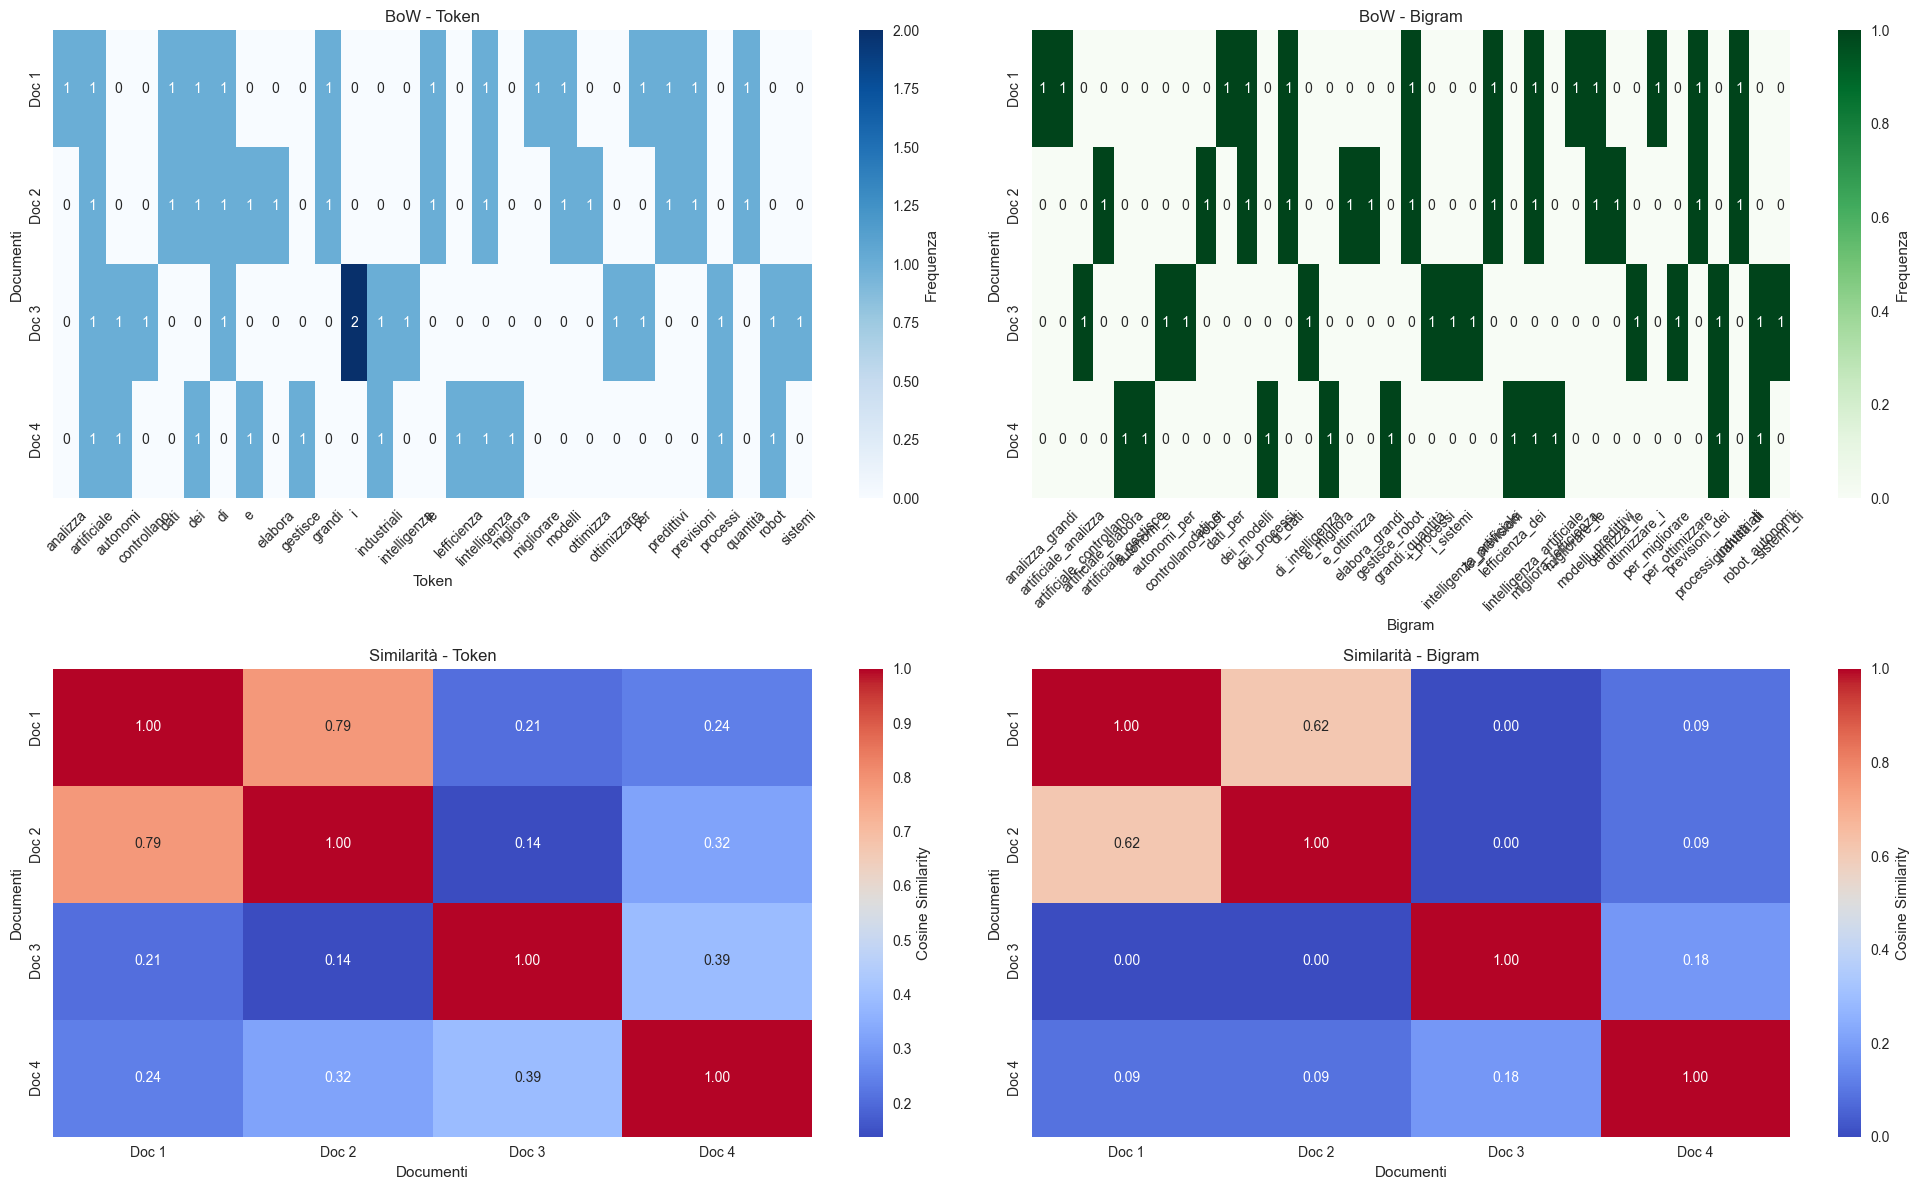

In [22]:
# -------------------------------
# Classe Bag of Words (token + bigram)
# -------------------------------
class BagOfWords:
    def __init__(self):
        self.vocabolario = {}
        self.vocabolario_inverso = {}
        self.dimensione_vocab = 0

    def costruisci_vocabolario(self, documenti, ngram=1):
        """Costruisce il vocabolario da token o ngram (1=token, 2=bigram)"""
        tutti_ngrams = set()

        for doc in documenti:
            parole = self._preprocess(doc)
            if ngram == 1:
                tokens = parole
            elif ngram == 2:
                tokens = self._genera_bigrams(parole)
            else:
                raise ValueError("ngram supportati: 1 (token) o 2 (bigram)")

            tutti_ngrams.update(tokens)

        # Costruisco vocabolario
        for i, token in enumerate(sorted(tutti_ngrams)):
            self.vocabolario[token] = i
            self.vocabolario_inverso[i] = token

        self.dimensione_vocab = len(self.vocabolario)
        print(f"\n📚 Vocabolario (ngram={ngram}): {self.dimensione_vocab} elementi")
        #for i, token in enumerate(sorted(self.vocabolario.keys()), 1):
        #    print(f"{i}. {token}")

    def documento_to_vettore(self, documento, ngram=1):
        """Converte un documento in vettore BoW di token o bigram"""
        vettore = np.zeros(self.dimensione_vocab)
        parole = self._preprocess(documento)
        if ngram == 1:
            tokens = parole
        elif ngram == 2:
            tokens = self._genera_bigrams(parole)
        else:
            raise ValueError("ngram supportati: 1 o 2")

        for token in tokens:
            if token in self.vocabolario:
                vettore[self.vocabolario[token]] += 1

        return vettore

    def trasforma_documenti(self, documenti, ngram=1):
        """Trasforma lista di documenti in matrice BoW"""
        matrice = []
        for doc in documenti:
            vettore = self.documento_to_vettore(doc, ngram=ngram)
            matrice.append(vettore)
        return np.array(matrice)

    # -------------------------------
    # Helper
    # -------------------------------
    def _preprocess(self, doc):
        # minuscolo + rimozione punteggiatura semplice
        import re
        doc = doc.lower()
        doc = re.sub(r'[^\w\s]', '', doc)
        parole = doc.split()
        return parole

    def _genera_bigrams(self, parole):
        return [f"{parole[i]}_{parole[i+1]}" for i in range(len(parole)-1)]

# -------------------------------
# Documenti di esempio
# -------------------------------
documenti_esempio = [
    "L'intelligenza artificiale analizza grandi quantità di dati per migliorare le previsioni dei modelli predittivi.",
    "L'intelligenza artificiale elabora grandi quantità di dati e ottimizza le previsioni dei modelli predittivi.",
    "I sistemi di intelligenza artificiale controllano robot autonomi per ottimizzare i processi industriali.",
    "L'intelligenza artificiale gestisce robot autonomi e migliora l'efficienza dei processi industriali."
]

# -------------------------------
# Calcolo BoW e similarità per token
# -------------------------------
bow_token = BagOfWords()
bow_token.costruisci_vocabolario(documenti_esempio, ngram=1)
matrice_token = bow_token.trasforma_documenti(documenti_esempio, ngram=1)
similarita_token = cosine_similarity(matrice_token)

# -------------------------------
# Calcolo BoW e similarità per bigram
# -------------------------------
bow_bigram = BagOfWords()
bow_bigram.costruisci_vocabolario(documenti_esempio, ngram=2)
matrice_bigram = bow_bigram.trasforma_documenti(documenti_esempio, ngram=2)
similarita_bigram = cosine_similarity(matrice_bigram)

# -------------------------------
# Visualizzazione
# -------------------------------

# BoW token vs bigram affiancate
df_token = pd.DataFrame(matrice_token, columns=list(bow_token.vocabolario.keys()), index=[f"Doc {i+1}" for i in range(len(documenti_esempio))])
df_bigram = pd.DataFrame(matrice_bigram, columns=list(bow_bigram.vocabolario.keys()), index=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.heatmap(df_token, annot=True, cmap='Blues', ax=axes[0,0], cbar_kws={'label': 'Frequenza'})
axes[0,0].set_title('BoW - Token')
axes[0,0].set_xlabel('Token')
axes[0,0].set_ylabel('Documenti')
axes[0,0].tick_params(axis='x', rotation=45)

sns.heatmap(df_bigram, annot=True, cmap='Greens', ax=axes[0,1], cbar_kws={'label': 'Frequenza'})
axes[0,1].set_title('BoW - Bigram')
axes[0,1].set_xlabel('Bigram')
axes[0,1].set_ylabel('Documenti')
axes[0,1].tick_params(axis='x', rotation=45)

# Similarità token vs bigram affiancate
df_sim_token = pd.DataFrame(similarita_token, index=[f"Doc {i+1}" for i in range(len(documenti_esempio))], columns=[f"Doc {i+1}" for i in range(len(documenti_esempio))])
df_sim_bigram = pd.DataFrame(similarita_bigram, index=[f"Doc {i+1}" for i in range(len(documenti_esempio))], columns=[f"Doc {i+1}" for i in range(len(documenti_esempio))])

sns.heatmap(df_sim_token, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,0], cbar_kws={'label': 'Cosine Similarity'})
axes[1,0].set_title('Similarità - Token')
axes[1,0].set_xlabel('Documenti')
axes[1,0].set_ylabel('Documenti')

sns.heatmap(df_sim_bigram, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,1], cbar_kws={'label': 'Cosine Similarity'})
axes[1,1].set_title('Similarità - Bigram')
axes[1,1].set_xlabel('Documenti')
axes[1,1].set_ylabel('Documenti')

plt.tight_layout()
plt.show()